In [2]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
from dnn_app_utils_v3 import *
from data import *

In [3]:
def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):  # lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.

    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []  # keep track of cost

    # START CODE HERE
    parameters = initialize_parameters_deep(layers_dims)
    # END CODE HERE

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)

        # Compute cost.
        cost = compute_cost(AL, Y)

        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

In [4]:
def setup_plt():
    plt.rcParams['figure.figsize'] = (5.0, 4.0)  # set default size of plots
    plt.rcParams['image.interpolation'] = 'nearest'
    plt.rcParams['image.cmap'] = 'gray'

In [5]:
def show_picture(index, train_x_orig, train_y, classes):
    index = index
    plt.imshow(train_x_orig[index])
    print("y = " + str(train_y[index]) + ". It's a " + str(classes[train_y[index]]) + " cell.")
    plt.show()

In [6]:
def show_picture_old(index, train_x_orig, train_y, classes):
    index = index
    plt.imshow(train_x_orig[index])
    print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]] +  " picture.")

In [7]:
def explore_dataset(train_x_orig, train_y, test_x_orig, test_y):
    m_train = train_x_orig.shape[0]
    num_px = train_x_orig.shape[1]
    m_test = test_x_orig.shape[0]

    print("Number of training examples: " + str(m_train))
    print("Number of testing examples: " + str(m_test))
    print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
    print("train_x_orig shape: " + str(train_x_orig.shape))
    print("train_y shape: " + str(train_y.shape))
    print("test_x_orig shape: " + str(test_x_orig.shape))
    print("test_y shape: " + str(test_y.shape))

In [8]:
def flatten_and_normalize(train_x_orig, train_y, test_x_orig, test_y):
    # Reshape the training and test examples
    train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0],
                                           -1).T  # The "-1" makes reshape flatten the remaining dimensions
    test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

    # Standardize data to have feature values between 0 and 1.
    train_x = train_x_flatten / 255.
    test_x = test_x_flatten / 255.

    return train_x, test_x

In [9]:
def main():
    setup_plt()
    train_x_orig, test_x_orig, train_y, test_y, classes = load_data()
    show_picture(10, train_x_orig, train_y, classes)
    explore_dataset(train_x_orig, train_y, test_x_orig, test_y)
    train_x, test_x = flatten_and_normalize(train_x_orig, train_y, test_x_orig, test_y)

    layers_dims = [50700, 50, 40, 15, 5, 1]  # 4-layer model
    parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations=2400, print_cost=True)

    pred_train = predict(train_x, train_y, parameters)
    pred_test = predict(test_x, test_y, parameters)

In [10]:
setup_plt()

In [11]:
train_x_orig, test_x_orig, train_y, test_y, classes = load_data()

In [12]:
train_y.shape

(1, 3693)

In [13]:
test_y.shape

(1, 1819)

y = 1. It's a parasitized picture.


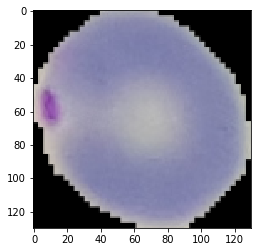

In [14]:
show_picture_old(11, train_x_orig, train_y, classes)

In [15]:
explore_dataset(train_x_orig, train_y, test_x_orig, test_y)

Number of training examples: 3693
Number of testing examples: 1819
Each image is of size: (130, 130, 3)
train_x_orig shape: (3693, 130, 130, 3)
train_y shape: (1, 3693)
test_x_orig shape: (1819, 130, 130, 3)
test_y shape: (1, 1819)


In [16]:
train_x_orig.shape

(3693, 130, 130, 3)

In [17]:
train_x, test_x = flatten_and_normalize(train_x_orig, train_y, test_x_orig, test_y)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.642506
Cost after iteration 200: 0.609467
Cost after iteration 300: 0.587628
Cost after iteration 400: 0.573200
Cost after iteration 500: 0.563737
Cost after iteration 600: 0.557601
Cost after iteration 700: 0.553674
Cost after iteration 800: 0.551194
Cost after iteration 900: 0.549646
Cost after iteration 1000: 0.548690
Cost after iteration 1100: 0.548105
Cost after iteration 1200: 0.547749
Cost after iteration 1300: 0.547534
Cost after iteration 1400: 0.547405
Cost after iteration 1500: 0.547327
Cost after iteration 1600: 0.547281
Cost after iteration 1700: 0.547252
Cost after iteration 1800: 0.547235
Cost after iteration 1900: 0.547225
Cost after iteration 2000: 0.547219
Cost after iteration 2100: 0.547214
Cost after iteration 2200: 0.547211
Cost after iteration 2300: 0.547209


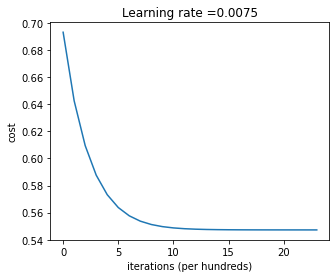

In [18]:
layers_dims = [50700, 50, 40, 15, 5, 1]  # 4-layer model
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations=2400, print_cost=True)

In [20]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.7633360411589494


In [21]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.7658053875755908


In [19]:
show_picture_old()

(50700, 3693)

In [22]:
parameters

{'W1': array([[ 7.21363083e-03, -2.71717816e-03, -2.34594789e-03, ...,
         -3.91767475e-03,  5.82427211e-03,  5.25475422e-03],
        [-4.23376044e-03, -7.88246418e-03,  4.31881002e-03, ...,
         -3.46208197e-03, -2.68118115e-03,  1.30741222e-03],
        [-4.36355700e-03, -2.96707233e-05,  1.99548955e-03, ...,
          1.10879909e-03,  1.58925250e-04,  7.45895193e-03],
        ...,
        [ 8.67213219e-04,  5.01689953e-04, -1.07028446e-03, ...,
          2.77803189e-03,  1.07631613e-04, -8.86425841e-03],
        [-2.54244678e-03, -2.48199110e-03,  2.64926396e-03, ...,
         -3.63219020e-03,  7.55355203e-03, -7.38152911e-04],
        [-1.43964150e-03, -2.13003018e-03,  7.44976299e-03, ...,
          6.00692515e-03,  3.70536321e-03,  5.56554460e-04]]),
 'b1': array([[ 1.35645666e-02],
        [ 3.51916052e-02],
        [-3.62270154e-03],
        [ 2.65670559e-02],
        [ 8.23726989e-04],
        [ 1.94412114e-03],
        [ 3.14075418e-02],
        [ 7.17229276e-03],
 

In [23]:
import pickle

In [24]:
filename = 'saved_parameters'
outfile = open(filename, 'wb')

In [25]:
pickle.dump(parameters,outfile)

In [26]:
outfile.close()

In [27]:
# parameters saved

In [28]:
# reload them to check

In [29]:
infile = open(filename, 'rb')

In [30]:
new_params = pickle.load(infile)

In [31]:
infile.close()

In [33]:
print(new_params)

{'W1': array([[ 7.21363083e-03, -2.71717816e-03, -2.34594789e-03, ...,
        -3.91767475e-03,  5.82427211e-03,  5.25475422e-03],
       [-4.23376044e-03, -7.88246418e-03,  4.31881002e-03, ...,
        -3.46208197e-03, -2.68118115e-03,  1.30741222e-03],
       [-4.36355700e-03, -2.96707233e-05,  1.99548955e-03, ...,
         1.10879909e-03,  1.58925250e-04,  7.45895193e-03],
       ...,
       [ 8.67213219e-04,  5.01689953e-04, -1.07028446e-03, ...,
         2.77803189e-03,  1.07631613e-04, -8.86425841e-03],
       [-2.54244678e-03, -2.48199110e-03,  2.64926396e-03, ...,
        -3.63219020e-03,  7.55355203e-03, -7.38152911e-04],
       [-1.43964150e-03, -2.13003018e-03,  7.44976299e-03, ...,
         6.00692515e-03,  3.70536321e-03,  5.56554460e-04]]), 'b1': array([[ 1.35645666e-02],
       [ 3.51916052e-02],
       [-3.62270154e-03],
       [ 2.65670559e-02],
       [ 8.23726989e-04],
       [ 1.94412114e-03],
       [ 3.14075418e-02],
       [ 7.17229276e-03],
       [ 2.43454630e-

In [34]:
pred_test = predict(test_x, test_y, new_params)

Accuracy: 0.7658053875755908
